# MIVIT Tutorial

MIVIT (Mulit-Instrument Visualization Toolkit) is a python package for visualizing spatialy-varying geospace data sets.  This tutorial will introduce the MIVIT package and how to make different kinds of plots with a variety of spatial data.

This tutorial is designed to be used with the MemorialDayStorm data set.  Please obtain this data set from https://ingeo.datatransport.org/data/datasets/MemorialDayStorm/ and save it in the same directory as `mivit_tutorial.ipynb`.

## Basic Example

In [1]:
import mivit
import numpy as np
import datetime as dt
import h5py
import matplotlib
%matplotlib inline

Let's start by plotting some GPS TEC data from madrigal.  These data are in the file `MemorialDayStorm/gps170528g.004.hdf5`, and we can read the file using h5py.  To create a MIVIT `DataSet` object, we need three things:
- data spatial coordinates
- data values
- time range over which data are valid

In the case of the GPS TEC data, the data spatial coordinates are arrays of latitude and longitude values, the data values are the actual TEC values at each lat/lon point, and the time range is the time period over which these TEC values are valid.  A good way to set the time range is to use the two time steps from the file that are on either side of your target time.

In [2]:
# first, define a target time to consider and convert to Unix Time
targtime = dt.datetime(2017,5,28,5,30)
utargtime = (targtime-dt.datetime.utcfromtimestamp(0)).total_seconds()

# read values from the hdf5 files
with h5py.File('MemorialDayStorm/gps170528g.004.hdf5','r') as file:

    tstmp = file['/Data/Array Layout/timestamps'][:]
    ti = np.argwhere((utargtime>=tstmp[:-1]) & (utargtime<tstmp[1:]))[0][0]
    time_range = [dt.datetime.utcfromtimestamp(tstmp[ti]), dt.datetime.utcfromtimestamp(tstmp[ti+1])]

    lat = file['/Data/Array Layout/gdlat'][:]
    lon = file['/Data/Array Layout/glon'][:]
    tec = file['/Data/Array Layout/2D Parameters/tec'][:,:,ti]
longitude, latitude = np.meshgrid(lon,lat)
altitude = np.full(lon.shape, 350.)

# use the latitude, longitude, altitude, and tec arrays to create a DataSet object
# also, make sure to set time_range and a name for the dataset
ds = mivit.DataSet(values=tec, latitude=latitude, longitude=longitude, altitude=altitude, time_range=time_range, name='GPS TEC')

Now, let's define how the TEC data will be ploted by creating a PlotMethod object.  The PlotMethod object take in most matplotlib keywords.  It is possible to plot the same data set multiple ways by defining multiple PlotMethod objects.

In [3]:
pm = mivit.PlotMethod(cmap='magma',plot_type='contourf', label='GPS TEC', levels=25, vmin=0, vmax=20)

Then, combine your DataSet object and PlotMethod objects into a single DataVisualization object.

In [4]:
tec = mivit.DataVisualization(ds,pm)

Plot the DataVisualization object with the one_map method of the Visualize class.

Datasets range from 2017-05-28 05:30:00 to 2017-05-28 05:35:00, covering 5.0 minutes.


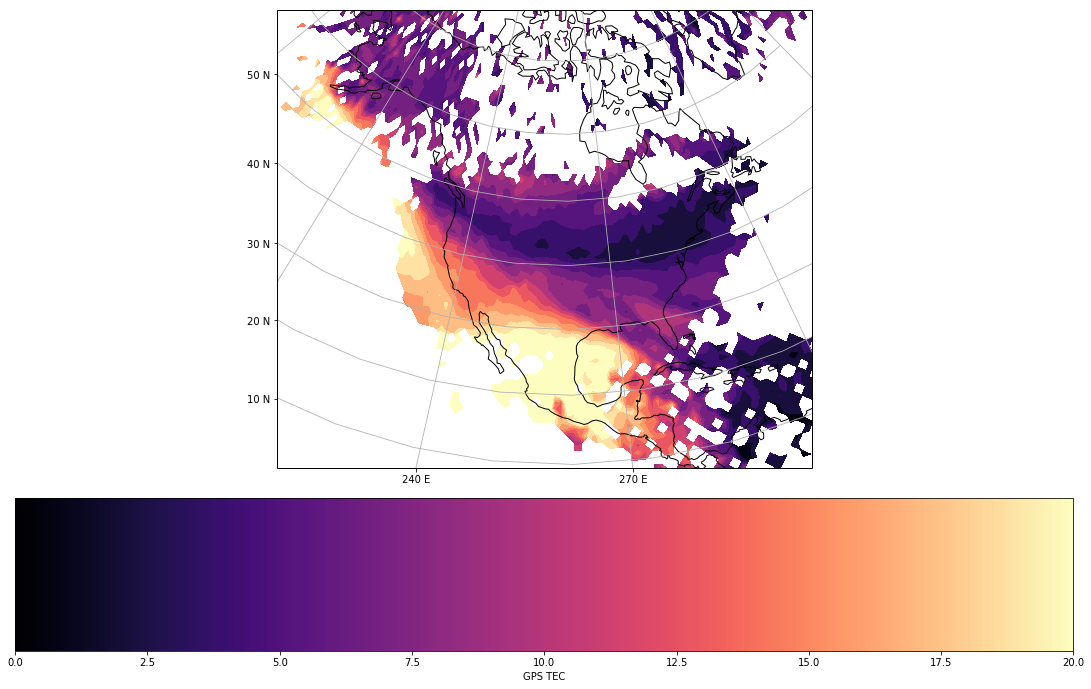

In [5]:
plot = mivit.Visualize([tec], map_extent=[-140,-65,7,73], map_proj='LambertConformal', map_proj_kwargs={'central_longitude':-100,'central_latitude':35})
plot.one_map()

You can also add magnetic gridline and state boundaries using the map_features keyword.

Datasets range from 2017-05-28 05:30:00 to 2017-05-28 05:35:00, covering 5.0 minutes.


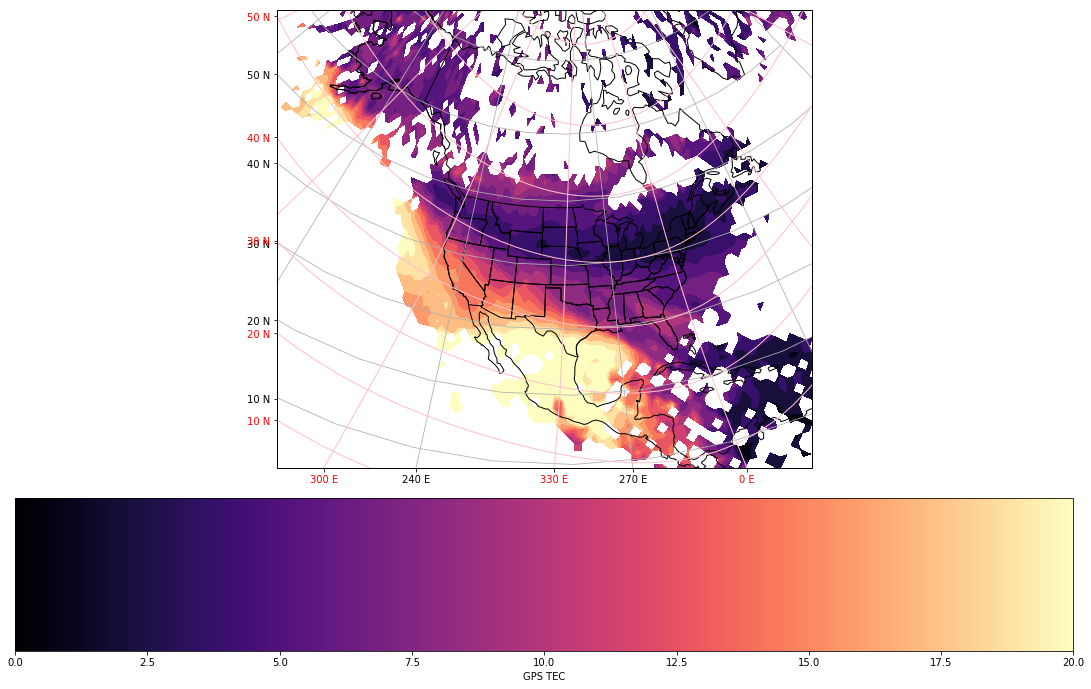

In [6]:
plot = mivit.Visualize([tec], map_features=['gridlines','coastlines','mag_gridlines','statelines'], map_extent=[-140,-65,7,73], map_proj='LambertConformal', map_proj_kwargs={'central_longitude':-100,'central_latitude':35})
plot.one_map()

## Helper Scripts

The MIVIT archetecture allows you to organize data sets and plot parameters in a convenient way, but creating DataSet objects can still be challenging becuase it requires manually accessing the data and creating the appropriate arrays.  To help with this, MIVIT contains a series of helper scripts, which will generate DataSet objects automatically for certain commonly used geospace data.  As an example, let's look at some mango data using a DataSet object generated by the mango helper script.

/opt/conda/envs/py36/lib/python3.6/site-packages/mangopy/mosaic.py:130: RuntimeWarning: invalid value encountered in greater_equal
  flags = np.all(np.array([lon_arr>=limits[0][:,None],lon_arr<=limits[1][:,None]]),axis=0)
/opt/conda/envs/py36/lib/python3.6/site-packages/mangopy/mosaic.py:130: RuntimeWarning: invalid value encountered in less_equal
  flags = np.all(np.array([lon_arr>=limits[0][:,None],lon_arr<=limits[1][:,None]]),axis=0)


Attempting to download LMay2817.h5 from FTP server.
Exception: No data available for Millstone Hill Observatory on 2017-05-28.
Attempting to download PMay2817.h5 from FTP server.
Exception: No data available for Pisgah Astronomical Observatory on 2017-05-28.
Attempting to download DMay2817.h5 from FTP server.
Exception: No data available for McDonald Observatory on 2017-05-28.
Datasets range from 2017-05-28 05:30:00 to 2017-05-28 05:35:39, covering 5.65 minutes.


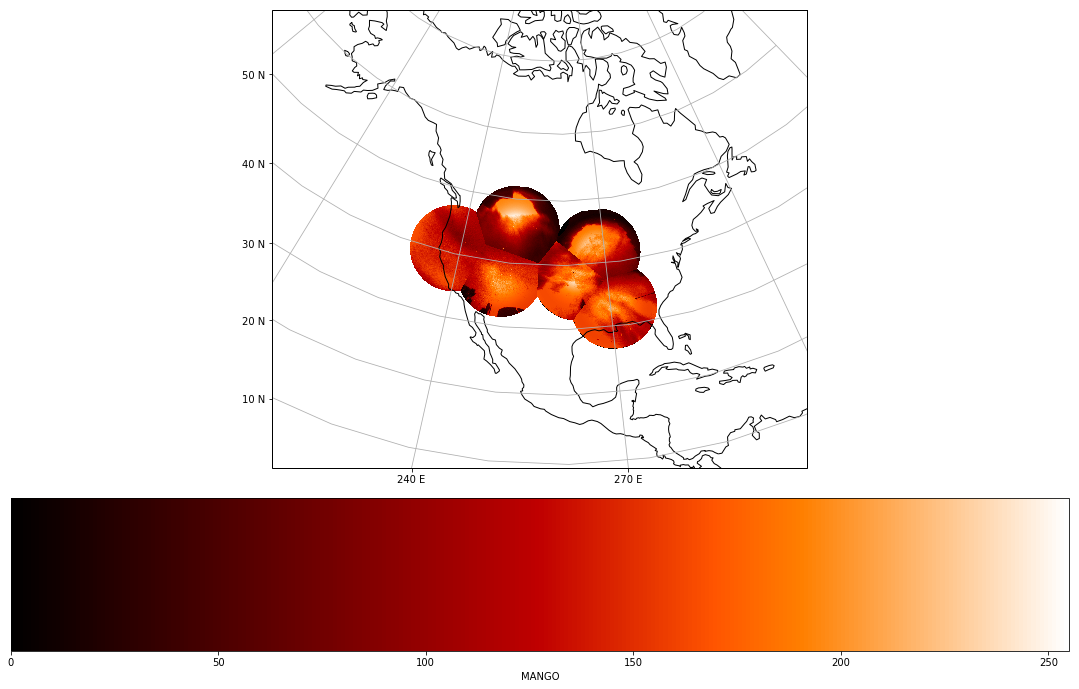

In [7]:
ds = mivit.helper.mango.mosaic(targtime,mangopy_kwargs={'datadir':'./MemorialDayStorm/MANGO'})
pm = mivit.PlotMethod(cmap='gist_heat',plot_type='pcolormesh', label='MANGO', vmin=0, vmax=255)
mango = mivit.DataVisualization(ds, pm)
plot = mivit.Visualize([mango], map_extent=[-140,-65,7,73], map_proj='LambertConformal', map_proj_kwargs={'central_longitude':-100,'central_latitude':35})
plot.one_map()

Helper scripts (whenever possible) use existing software packages developed by the data providers (e.g., SuperDARN helper scripts use davitpy and MANGO helper scripts use mangopy).  This means that these additional packages must be installed on your system to use the MIVIT helper scripts.  By default, these additional packages are NOT requirements for MIVIT, so they are not automatically installed when MIVIT is installed - you must install them yourself if you want to use particular helper scripts.  The above example will NOT work if you do not have mangopy installed.

## Complete Example
Let's do an example of plotting multiple diverse geospace datasets together with MIVIT.

First, use the mango helper scripts to generate a MANGO DataVisualization object.

In [8]:
targtime = dt.datetime(2017,5,28,6,30)

ds = mivit.helper.mango.mosaic(targtime,mangopy_kwargs={'datadir':'./MemorialDayStorm/MANGO'})
pm = mivit.PlotMethod(cmap='gist_gray',plot_type='pcolormesh', label='MANGO', vmin=0, vmax=255)
mango = mivit.DataVisualization(ds, pm)

Attempting to download LMay2817.h5 from FTP server.
Exception: No data available for Millstone Hill Observatory on 2017-05-28.
Attempting to download PMay2817.h5 from FTP server.
Exception: No data available for Pisgah Astronomical Observatory on 2017-05-28.
Attempting to download DMay2817.h5 from FTP server.
Exception: No data available for McDonald Observatory on 2017-05-28.


Now, use the madrigal helper scripts to generate DataVisualization objects for GPS TEC, and DMSP plasma density, and the Millstone Hill Observatory FPI.  The madrigal helper script requires users to give their name, email, and institutional affiliation, as requested by the Madrigal database.

In [9]:
user_info = {'fullname':'Full Name','email':'mivit_example@email.com','affiliation':'Institution'}
madrigal_dir = './MemorialDayStorm'

Create TEC DataVisualization object.  Multiple PlotMethod objects can be used so one data set is plotted multiple ways.  In this example, we're going to create a contour plot with a filled contour plot in the background that is semi-transparent (`alpha=0.2`).

In [10]:
ds = mivit.helper.madrigal.gps.tec(targtime,user_info, madrigal_dir=madrigal_dir)
pm1 = mivit.PlotMethod(cmap='magma',plot_type='contourf', label='GPS TEC', alpha=0.2, levels=25, vmin=0, vmax=20)
pm2 = mivit.PlotMethod(cmap='magma',plot_type='contour', label='GPS TEC', levels=25, vmin=0, vmax=20)
tec = mivit.DataVisualization(ds,[pm1,pm2])

Create a DataVisualization object that will plot DMSP ion densities as colored scatter.

In [11]:
ds = mivit.helper.madrigal.dmsp.density(targtime-dt.timedelta(hours=1), targtime+dt.timedelta(hours=1), user_info, madrigal_dir=madrigal_dir)
pm = mivit.PlotMethod(cmap='jet',plot_type='scatter',label='DMSP Ni', vmin=0, vmax=3e10, s=20)
dmsp = mivit.DataVisualization(ds, pm)

Create a DataVisualization object for the DMSP cross-track velocity.

In [12]:
ds = mivit.helper.madrigal.dmsp.velocity(targtime-dt.timedelta(hours=1), targtime+dt.timedelta(hours=1), user_info, madrigal_dir=madrigal_dir)
pm = mivit.PlotMethod(cmap='jet',plot_type='quiver',label='DMSP Vi', width=0.002)
dmsp_vec = mivit.DataVisualization(ds, pm)

Create DataVisualization objects for the Millstone Hill FPI red and green line neutral temperature measurements.

In [13]:
ds = mivit.helper.madrigal.fpi.Tn(targtime, 'green', user_info, madrigal_dir=madrigal_dir)
pm = mivit.PlotMethod(cmap='Greens', plot_type='scatter', label='FPI Tn', vmin=min(ds.values), vmax=max(ds.values), s=100)
fpi_g = mivit.DataVisualization(ds, pm)

ds = mivit.helper.madrigal.fpi.Tn(targtime, 'red', user_info, madrigal_dir=madrigal_dir)
pm = mivit.PlotMethod(cmap='Reds', plot_type='scatter', label='FPI Tn', vmin=min(ds.values), vmax=max(ds.values), s=30)    
fpi_r = mivit.DataVisualization(ds, pm)

Finally, create a combined plot of all the different datasets.

Datasets range from 2017-05-28 05:29:58 to 2017-05-28 07:29:58, covering 120.0 minutes.


/opt/conda/envs/py36/lib/python3.6/site-packages/matplotlib/contour.py:228: RuntimeWarning: invalid value encountered in greater
  or (np.ptp(linecontour, axis=0) > 1.2 * labelwidth).any())
/opt/conda/envs/py36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/opt/conda/envs/py36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


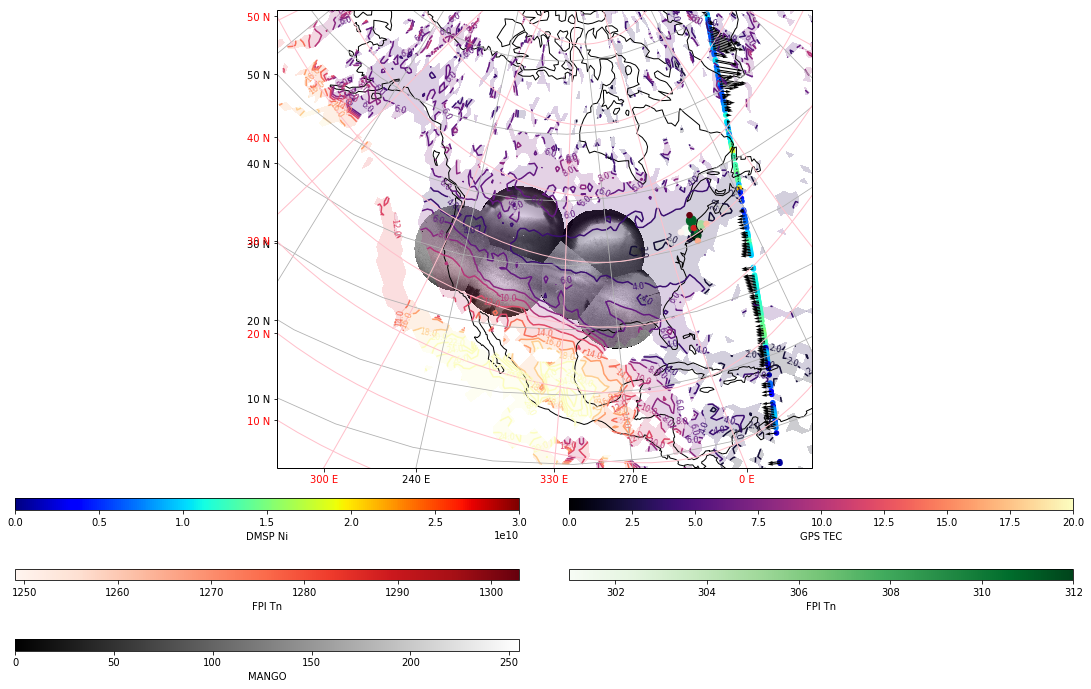

In [15]:
plot = mivit.Visualize([mango,tec,fpi_g,fpi_r,dmsp,dmsp_vec], map_features=['gridlines','coastlines','mag_gridlines'], map_extent=[-140,-65,7,73], map_proj='LambertConformal', map_proj_kwargs={'central_longitude':-100,'central_latitude':35})
plot.one_map()